# ESP operation

The module `Modules.ESP` contains the class `ESP` which can be called to operate **a single axis** of the physical ESP. The syntax is `ESP(axis, MAX_POSITION, testflight)`, where `axis` can be 1-3, corresponding to the connected devices on the ESP. `MAX_POSITION` is a two-element list defining the bounds of the axis in degress. Finally, the boolean `testflight` can be set to `True` to test and run code without having any physical devices connected.

In [4]:
#Initialize ESP
from Modules.ESP import *
cam_arm = ESP(axis = 1, MAX_POSITION=[-39, 100], velocity=10)
sample_arm = ESP(axis = 2, MAX_POSITION = [-90,90], velocity=4)
#pol_arm = ESP(axis = 3, MAX_POSITION = [-90,90], velocity=20)

11:37    Initializing new connection with ESP axis 1.
11:37    Initializing new connection with ESP axis 2.


### Setting up the ESP home positions
Every time the ESP is switched on, the current positions of the axes will be defined as 0. For obvious reasons this is not very confenient. Therefore it is good practice to redefine your home positions (angle = 0) before you start a measurement run. This can be done by calling the function `ESP.define_home()`.

In [25]:
#cam_arm.move_relative(0.5,'relative')
#sample_arm.move(-0.05,'relative')
#sample_arm.move(30,'absolute')
#cam_arm.define_home()
#sample_arm.define_home()
#pol_arm.define_home()
cam_arm.send_ASCII_command('2DH45')

True

### Moving the ESP
Congratulation, you are all set! There are a number of different commands to move the initialized axes, and luckily they are all very straightforward.
```
ESP.get_current_position() -> float
ESP.move_relative(degrees)
ESP.move_absolute(degrees)
ESP.move_home()
```
To send an ASCII command directly to the ESP, you can use the function `ESP.send_command(command)`. This function returns `True` if the command was sent succesfully and `False` if not. In the latter case it also prints the received error code. Please refer to the ESP documentation to find out what your error code means.

In [33]:
#cam_arm.send_command('set velocity',5)
t=70
sample_arm.move_absolute(t)
cam_arm.move_absolute(-90+2*t)


12:01    Moving to position 70 degrees.
12:01    Moving to position 50 degrees.


In [2]:
#pol_arm.send_command('set velocity',20)
pol_arm.move_relative(45)

16:22    Moving 45 degrees.


In [33]:
cam_arm.move_relative(-0.01)


14:54    Moving -0.01 degrees.


In [2]:
# restore home positions
cam_arm.move_home()
sample_arm.move_home()
pol_arm.move_home()

11:07    Moving to home position.
11:07    Moving to home position.
11:07    Moving to home position.


# Camera operation

The module `Modules.camera` contains the class `Cam` which can be called to connect to the *ThorLabs DCC1645C* camera. The syntax is `Cam(testflight=False)`. The boolean `testflight` can be set to `True` to test and run code without having any physical devices connected.

**WARNING**
After initializing the connection with e.g. `cam = Cam()`, rerunning that command will produce an error because the camera is already connected. The only way te resolve this, is to first call `Cam.shutdown()`. When running the file `camera.py` from the command line, this problem is resolved with an `atexit` call that automatically closes the connection when the program terminates.

In [12]:
from Modules.camera import Cam
settings = {
    'pixel_rate': 5e6,
    'frame_period': 0.15,
    'exposure': 0.15,
    'gains': (1.0, 1.0, 1.0, 1.0),
}
cam = Cam(settings)
cam.get_settings()
cam.shutdown()

13:36    Initializing connection with camera


image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  0.14015360000000002
roi:  (400, 900, 300, 700, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  0.1499184


13:36    Disconnecting camera


12:47    Taking median of captured images.


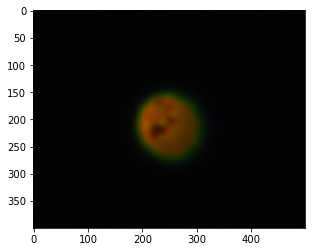

uint8


In [6]:
img = cam.take_images(nframes=10,median=True,show=True)
print(img.dtype)

In [3]:
import numpy as np
print(np.shape(img))
print(np.min(img),np.max(img))
#print(img)

(1024, 1280, 3)
0 21


In [10]:
cam.shutdown()

12:48    Disconnecting camera


# Measurement Sequence
To simplify the measurement sequence I created the file `BCR.py`. It contains the `BCR` class, which can perform standard measurement sequences and saves the data to a hdf5 file.

In [1]:
from Modules.BCR import BCR
import time
name = 'Chromatic Brewster Angle'
path = None
experiment = BCR(name, path)

Welcome to the Beetle Classifier Robot, great to have you back!
Let's start your experiment named: Chromatic Brewster Angle.


13:37    No project folder defined. Using default output folder.
13:37    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments
13:37    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

13:37    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

13:37    Initializing connection with camera


In [2]:
# Only run this block if neccessary 
experiment.cam_axis.MAX_POSITION =[-39, 90]
#experiment.cam_axis.define_home()
experiment.sample_axis.MAX_POSITION =[-90, 90]
#experiment.sample_axis.define_home()



image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  0.14015360000000002
roi:  (400, 900, 300, 700, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  0.1499184


14:07    Opening file Chromatic Brewster Angle.hdf5
14:07    Created HDF5 group 2021-11-11 - P polarization
14:07    Starting measurement sequence.
14:07    Moving to position 45.0 degrees.
14:07    Moving to position 45.0 degrees.
14:08    Taking median of captured images.


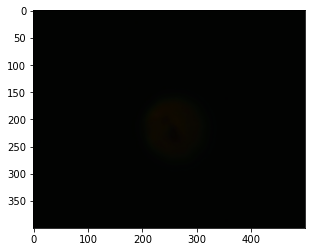

14:08    Moving to position 45.2 degrees.
14:08    Taking median of captured images.


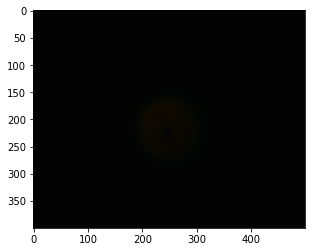

14:08    Moving to position 45.400000000000006 degrees.
14:08    Taking median of captured images.


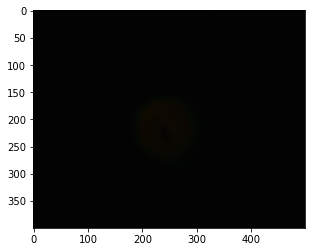

14:08    Moving to position 45.60000000000001 degrees.
14:08    Taking median of captured images.


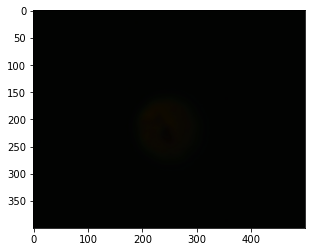

14:08    Moving to position 45.80000000000001 degrees.
14:09    Taking median of captured images.


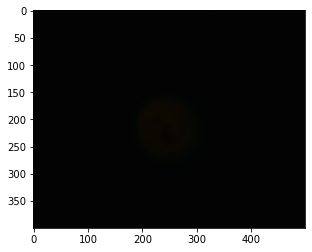

14:09    Moving to position 46.000000000000014 degrees.
14:09    Taking median of captured images.


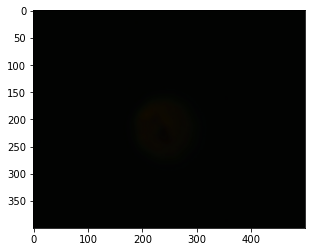

14:09    Moving to position 46.20000000000002 degrees.
14:09    Taking median of captured images.


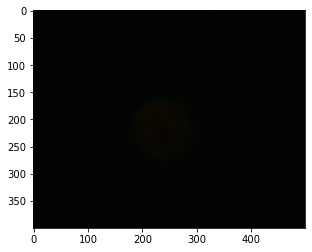

14:09    Moving to position 46.40000000000002 degrees.
14:09    Taking median of captured images.


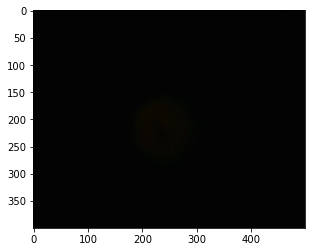

14:09    Moving to position 46.60000000000002 degrees.
14:10    Taking median of captured images.


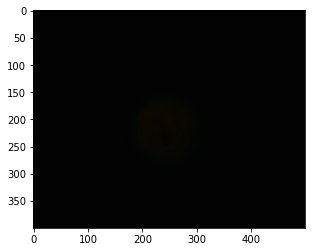

14:10    Moving to position 46.800000000000026 degrees.
14:10    Taking median of captured images.


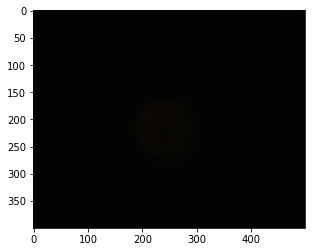

14:10    Moving to position 47.00000000000003 degrees.
14:10    Taking median of captured images.


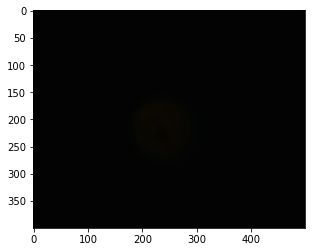

14:10    Moving to position 47.20000000000003 degrees.
14:11    Taking median of captured images.


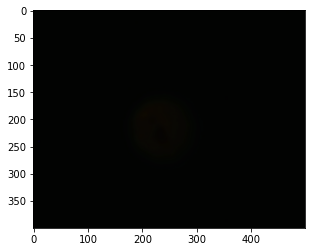

14:11    Moving to position 47.400000000000034 degrees.
14:11    Taking median of captured images.


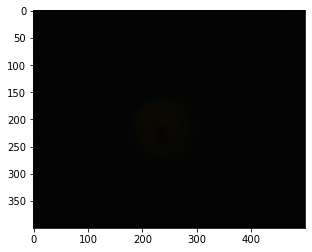

14:11    Moving to position 47.60000000000004 degrees.
14:11    Taking median of captured images.


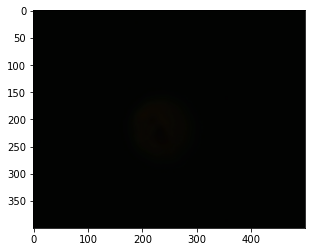

14:11    Moving to position 47.80000000000004 degrees.
14:11    Taking median of captured images.


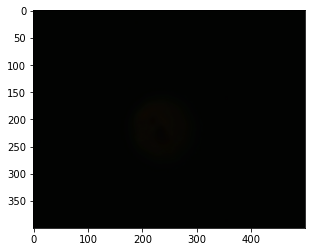

14:11    Moving to position 48.00000000000004 degrees.
14:12    Taking median of captured images.


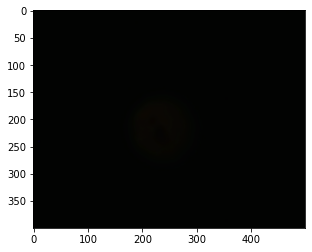

14:12    Moving to position 48.200000000000045 degrees.
14:12    Taking median of captured images.


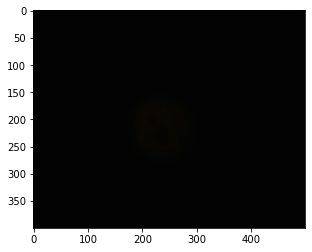

14:12    Moving to position 48.40000000000005 degrees.
14:12    Taking median of captured images.


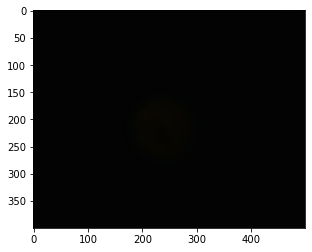

14:12    Moving to position 48.60000000000005 degrees.
14:12    Taking median of captured images.


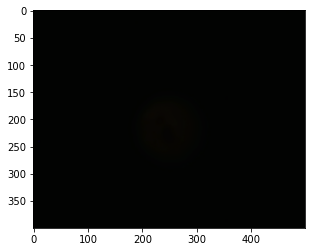

14:12    Moving to position 48.800000000000054 degrees.
14:13    Taking median of captured images.


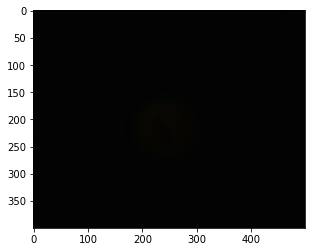

14:13    Moving to position 49.00000000000006 degrees.
14:13    Taking median of captured images.


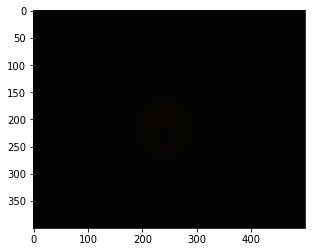

14:13    Moving to position 49.20000000000006 degrees.
14:13    Taking median of captured images.


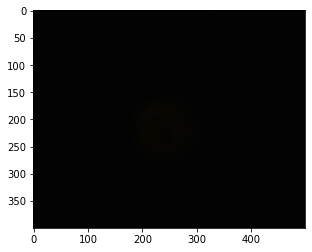

14:13    Moving to position 49.40000000000006 degrees.
14:14    Taking median of captured images.


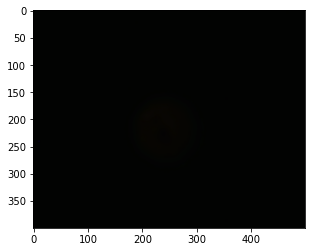

14:14    Moving to position 49.600000000000065 degrees.
14:14    Taking median of captured images.


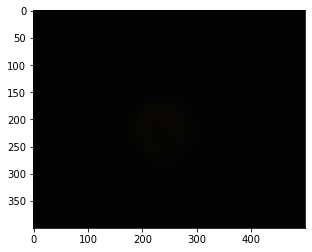

14:14    Moving to position 49.80000000000007 degrees.
14:14    Taking median of captured images.


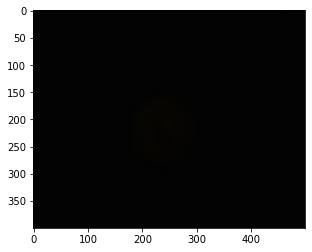

14:14    Moving to position 50.00000000000007 degrees.
14:14    Taking median of captured images.


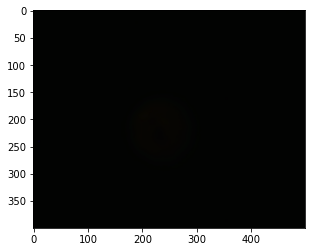

14:14    Moving to position 50.200000000000074 degrees.
14:15    Taking median of captured images.


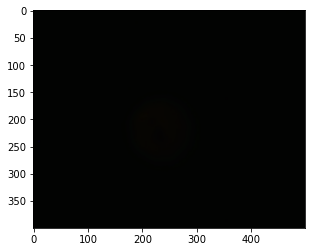

14:15    Moving to position 50.40000000000008 degrees.
14:15    Taking median of captured images.


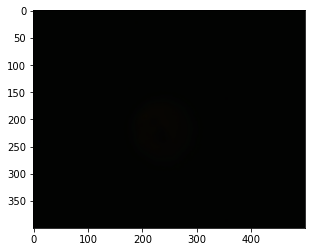

14:15    Moving to position 50.60000000000008 degrees.
14:15    Taking median of captured images.


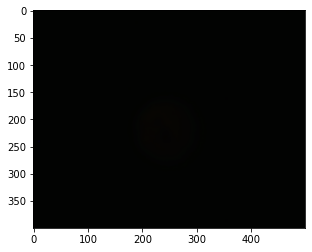

14:15    Moving to position 50.80000000000008 degrees.
14:15    Taking median of captured images.


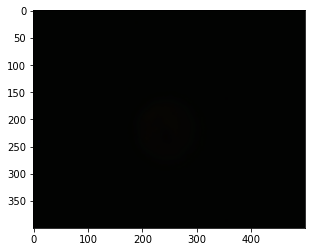

14:15    Moving to position 51.000000000000085 degrees.
14:16    Taking median of captured images.


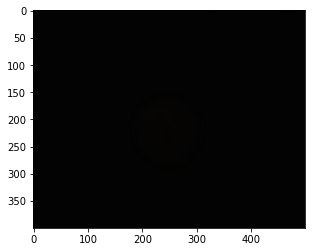

14:16    Moving to position 51.20000000000009 degrees.
14:16    Taking median of captured images.


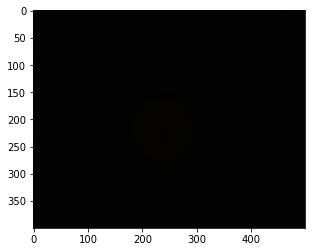

14:16    Moving to position 51.40000000000009 degrees.
14:16    Taking median of captured images.


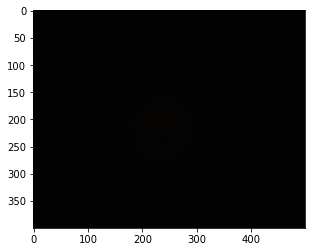

14:16    Moving to position 51.600000000000094 degrees.
14:17    Taking median of captured images.


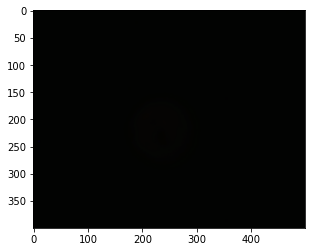

14:17    Moving to position 51.8000000000001 degrees.
14:17    Taking median of captured images.


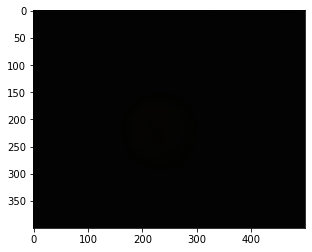

14:17    Moving to position 52.0000000000001 degrees.
14:17    Taking median of captured images.


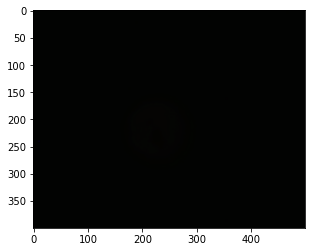

14:17    Moving to position 52.2000000000001 degrees.
14:17    Taking median of captured images.


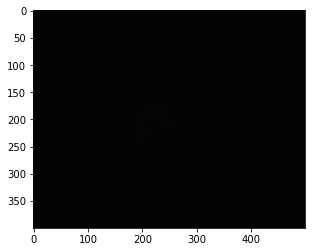

14:17    Moving to position 52.400000000000105 degrees.
14:18    Taking median of captured images.


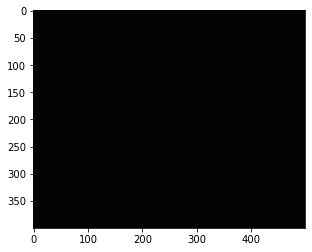

14:18    Moving to position 52.60000000000011 degrees.
14:18    Taking median of captured images.


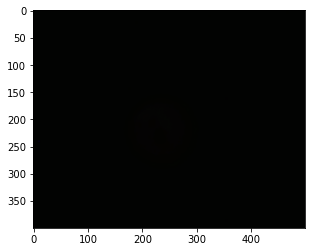

14:18    Moving to position 52.80000000000011 degrees.
14:18    Taking median of captured images.


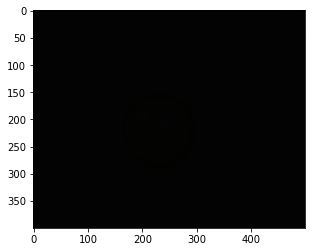

14:18    Moving to position 53.000000000000114 degrees.
14:18    Taking median of captured images.


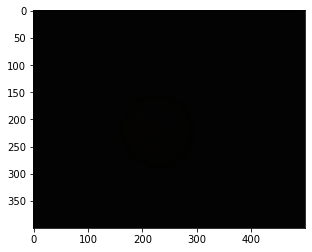

14:18    Moving to position 53.20000000000012 degrees.
14:19    Taking median of captured images.


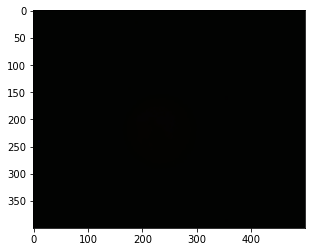

14:19    Moving to position 53.40000000000012 degrees.
14:19    Taking median of captured images.


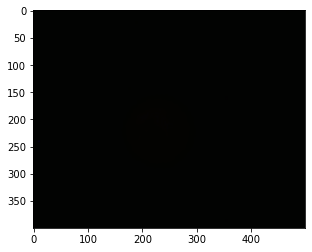

14:19    Moving to position 53.60000000000012 degrees.
14:19    Taking median of captured images.


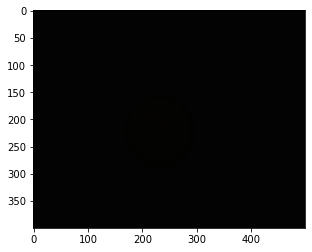

14:19    Moving to position 53.800000000000125 degrees.
14:19    Taking median of captured images.


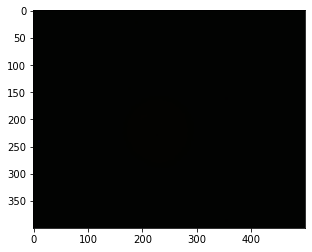

14:19    Moving to position 54.00000000000013 degrees.
14:20    Taking median of captured images.


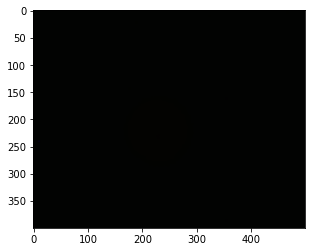

14:20    Moving to position 54.20000000000013 degrees.
14:20    Taking median of captured images.


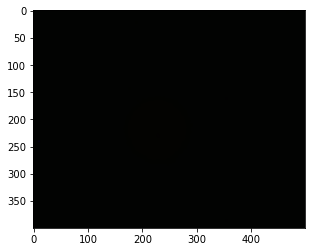

14:20    Moving to position 54.400000000000134 degrees.
14:20    Taking median of captured images.


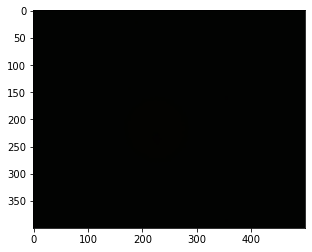

14:20    Moving to position 54.600000000000136 degrees.
14:21    Taking median of captured images.


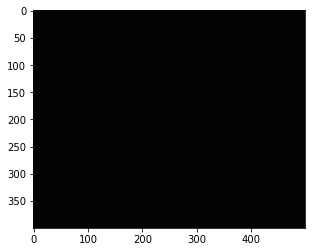

14:21    Moving to position 54.80000000000014 degrees.
14:21    Taking median of captured images.


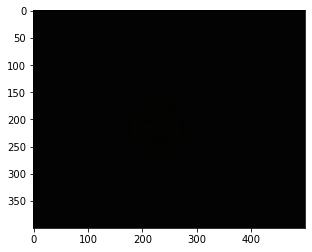

14:21    Moving to position 55.00000000000014 degrees.
14:21    Taking median of captured images.


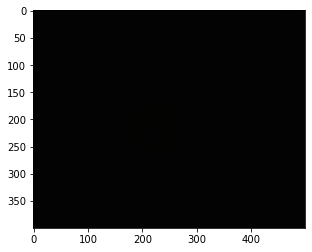

14:21    Moving to position 55.200000000000145 degrees.
14:21    Taking median of captured images.


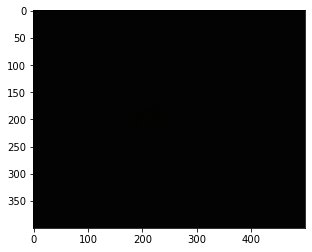

14:21    Moving to position 55.40000000000015 degrees.
14:22    Taking median of captured images.


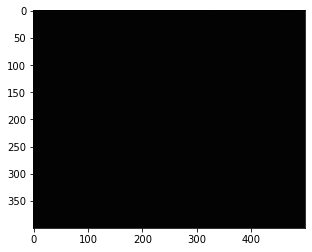

14:22    Moving to position 55.60000000000015 degrees.
14:22    Taking median of captured images.


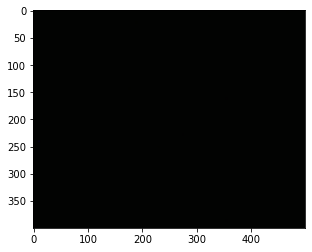

14:22    Moving to position 55.80000000000015 degrees.
14:22    Taking median of captured images.


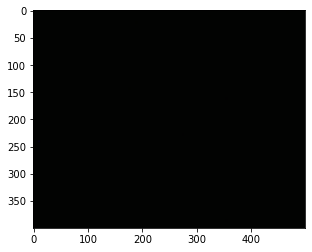

14:22    Moving to position 56.000000000000156 degrees.
14:22    Taking median of captured images.


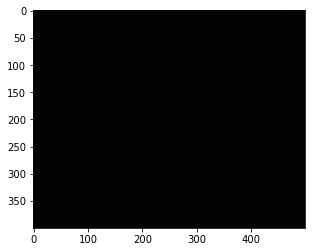

14:22    Moving to position 56.20000000000016 degrees.
14:23    Taking median of captured images.


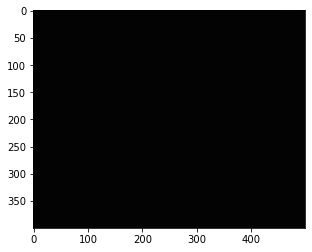

14:23    Moving to position 56.40000000000016 degrees.
14:23    Taking median of captured images.


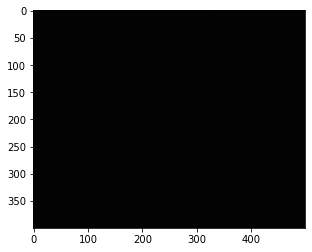

14:23    Moving to position 56.600000000000165 degrees.
14:23    Taking median of captured images.


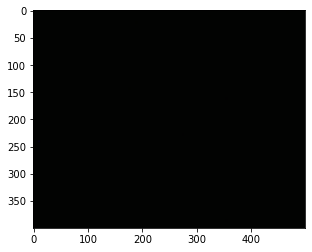

14:23    Moving to position 56.80000000000017 degrees.
14:24    Taking median of captured images.


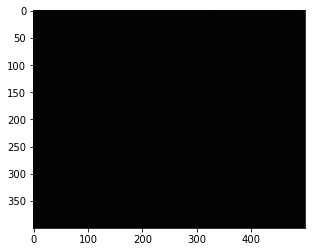

14:24    Moving to position 57.00000000000017 degrees.
14:24    Taking median of captured images.


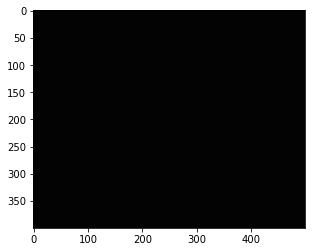

14:24    Moving to position 57.20000000000017 degrees.
14:24    Taking median of captured images.


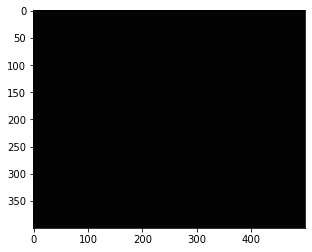

14:24    Moving to position 57.400000000000176 degrees.
14:24    Taking median of captured images.


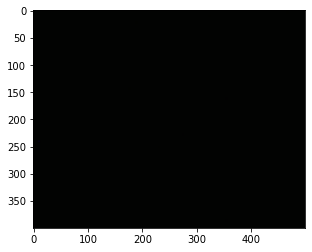

14:24    Moving to position 57.60000000000018 degrees.
14:25    Taking median of captured images.


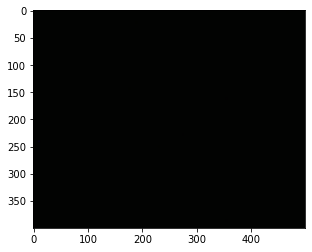

14:25    Moving to position 57.80000000000018 degrees.
14:25    Taking median of captured images.


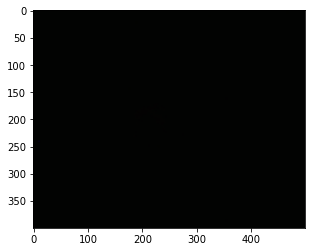

14:25    Moving to position 58.000000000000185 degrees.
14:25    Taking median of captured images.


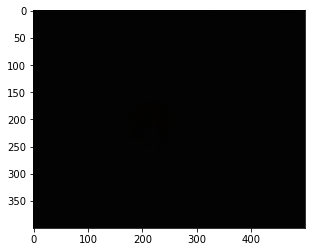

14:25    Moving to position 58.20000000000019 degrees.
14:25    Taking median of captured images.


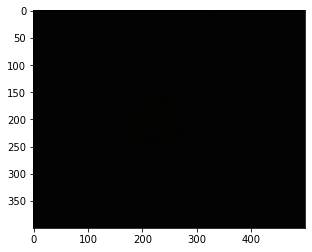

14:25    Moving to position 58.40000000000019 degrees.
14:26    Taking median of captured images.


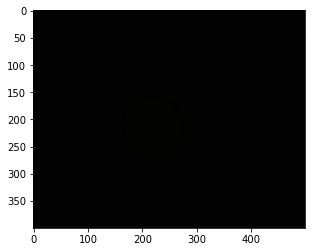

14:26    Moving to position 58.60000000000019 degrees.
14:26    Taking median of captured images.


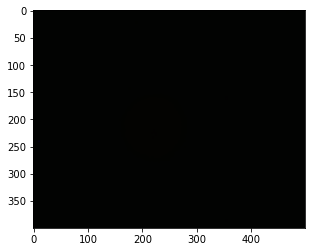

14:26    Moving to position 58.800000000000196 degrees.
14:26    Taking median of captured images.


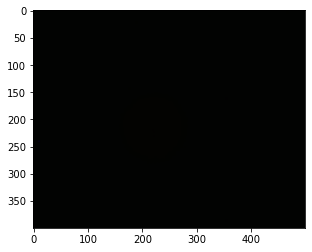

14:26    Moving to position 59.0000000000002 degrees.
14:26    Taking median of captured images.


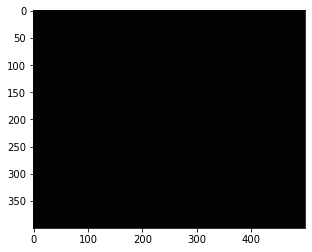

14:26    Moving to position 59.2000000000002 degrees.
14:27    Taking median of captured images.


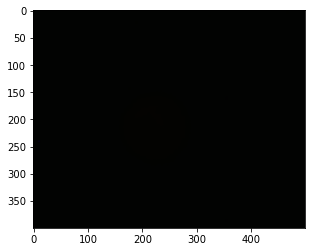

14:27    Moving to position 59.400000000000205 degrees.
14:27    Taking median of captured images.


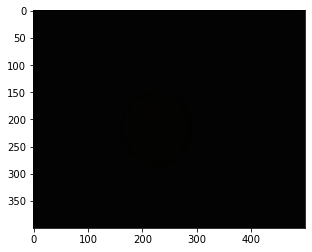

14:27    Moving to position 59.60000000000021 degrees.
14:27    Taking median of captured images.


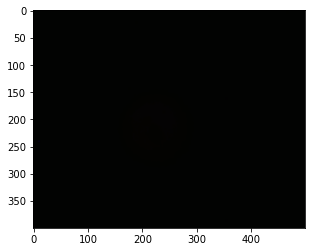

14:27    Moving to position 59.80000000000021 degrees.
14:28    Taking median of captured images.


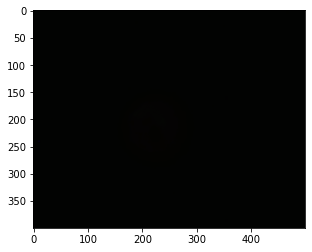

14:28    Moving to position 60.00000000000021 degrees.
14:28    Taking median of captured images.


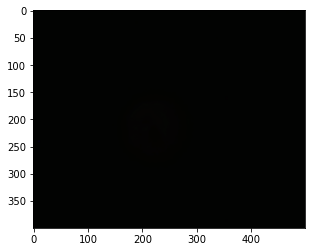

14:28    Moving to position 60.200000000000216 degrees.
14:28    Taking median of captured images.


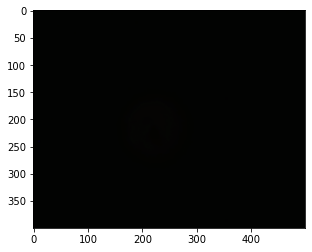

14:28    Moving to position 60.40000000000022 degrees.
14:28    Taking median of captured images.


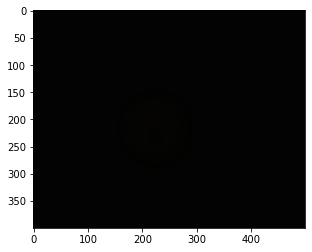

14:28    Moving to position 60.60000000000022 degrees.
14:29    Taking median of captured images.


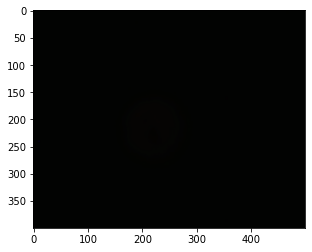

14:29    Moving to position 60.800000000000225 degrees.
14:29    Taking median of captured images.


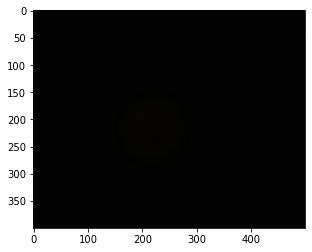

14:29    Moving to position 61.00000000000023 degrees.
14:29    Taking median of captured images.


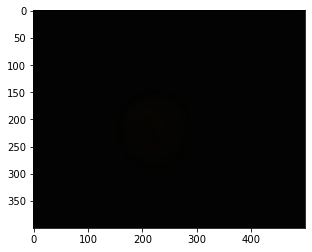

14:29    Moving to position 61.20000000000023 degrees.
14:29    Taking median of captured images.


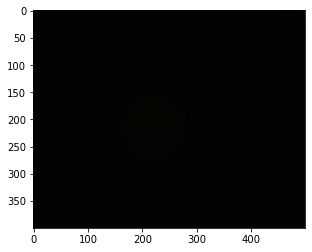

14:29    Moving to position 61.40000000000023 degrees.
14:30    Taking median of captured images.


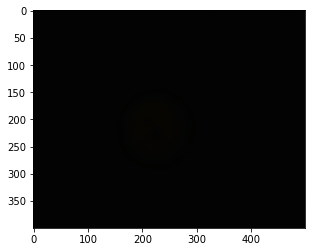

14:30    Moving to position 61.600000000000236 degrees.
14:30    Taking median of captured images.


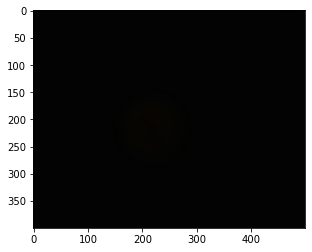

14:30    Moving to position 61.80000000000024 degrees.
14:30    Taking median of captured images.


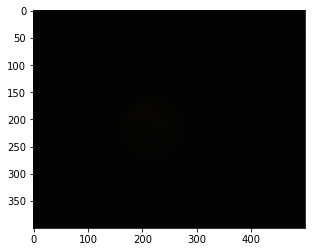

14:30    Moving to position 62.00000000000024 degrees.
14:31    Taking median of captured images.


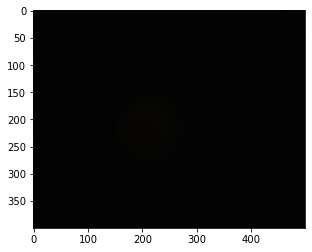

14:31    Moving to position 62.200000000000244 degrees.
14:31    Taking median of captured images.


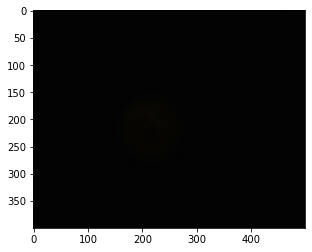

14:31    Moving to position 62.40000000000025 degrees.
14:31    Taking median of captured images.


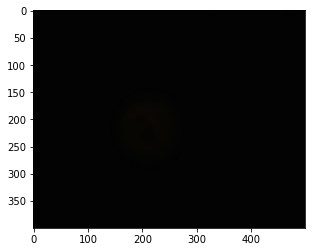

14:31    Moving to position 62.60000000000025 degrees.
14:31    Taking median of captured images.


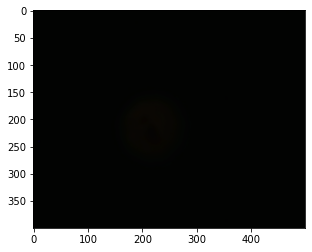

14:31    Moving to position 62.80000000000025 degrees.
14:32    Taking median of captured images.


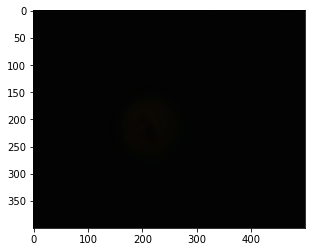

14:32    Moving to position 63.000000000000256 degrees.
14:32    Taking median of captured images.


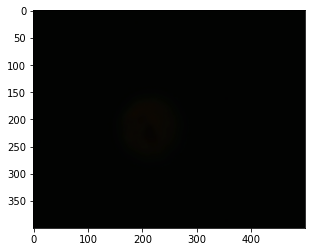

14:32    Moving to position 63.20000000000026 degrees.
14:32    Taking median of captured images.


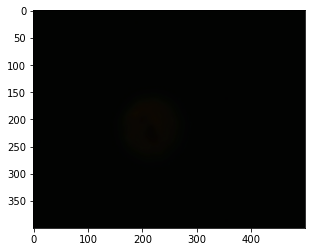

14:32    Moving to position 63.40000000000026 degrees.
14:32    Taking median of captured images.


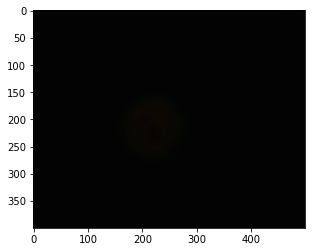

14:32    Moving to position 63.600000000000264 degrees.
14:33    Taking median of captured images.


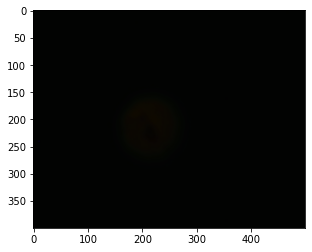

14:33    Moving to position 63.80000000000027 degrees.
14:33    Taking median of captured images.


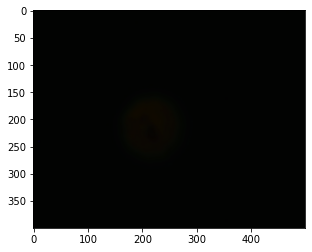

14:33    Moving to position 64.00000000000027 degrees.
14:33    Taking median of captured images.


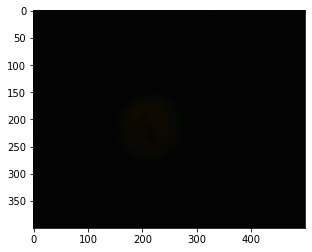

14:33    Moving to position 64.20000000000027 degrees.
14:34    Taking median of captured images.


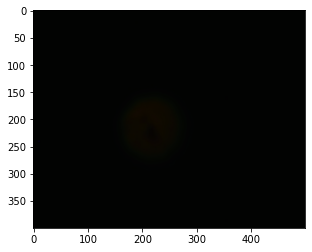

14:34    Moving to position 64.40000000000028 degrees.
14:34    Taking median of captured images.


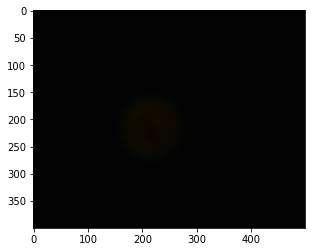

14:34    Moving to position 64.60000000000028 degrees.
14:34    Taking median of captured images.


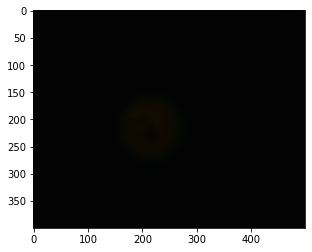

14:34    Moving to position 64.80000000000028 degrees.
14:34    Taking median of captured images.


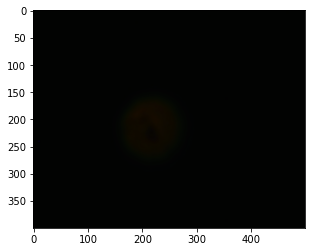

14:34    Moving to position 65.00000000000028 degrees.
14:35    Taking median of captured images.


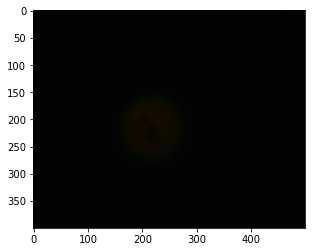

14:35    Moving to position 65.20000000000029 degrees.
14:35    Taking median of captured images.


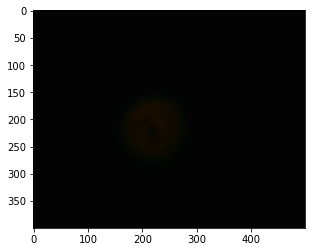

14:35    Measurement sequence completed!


In [4]:
measurement_name = 'P polarization'
metadata = {
    'Polarization source': 'P',
    'color filter': 'no',
}
experiment.brewster_sequence(measurement_name, metadata,
                             domain=[45, 65], 
                             step_size=0.2,
                             nframes=100,
                             dark=False
                            )




image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  0.14015360000000002
roi:  (400, 900, 300, 700, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  0.1499184


13:37    Opening file Chromatic Brewster Angle.hdf5
13:37    Created HDF5 group 2021-11-11 - S polarization
13:37    Starting measurement sequence.
13:37    Moving to position 45.0 degrees.
13:37    Moving to position 45.0 degrees.
13:37    Taking median of captured images.


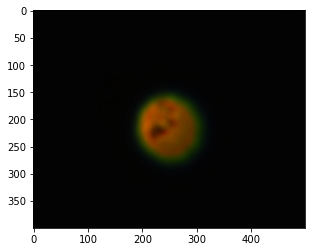

13:37    Moving to position 45.2 degrees.
13:38    Taking median of captured images.


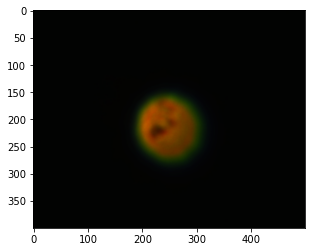

13:38    Moving to position 45.400000000000006 degrees.
13:38    Taking median of captured images.


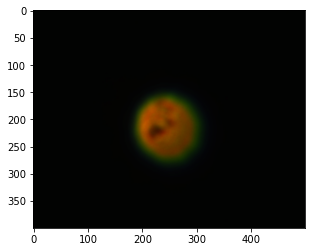

13:38    Moving to position 45.60000000000001 degrees.
13:38    Taking median of captured images.


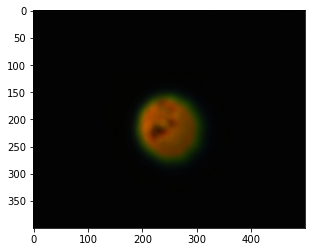

13:38    Moving to position 45.80000000000001 degrees.
13:38    Taking median of captured images.


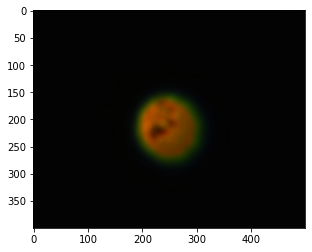

13:38    Moving to position 46.000000000000014 degrees.
13:39    Taking median of captured images.


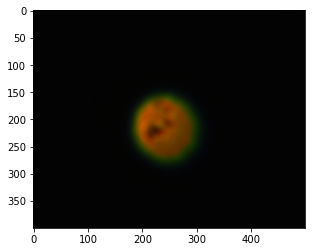

13:39    Moving to position 46.20000000000002 degrees.
13:39    Taking median of captured images.


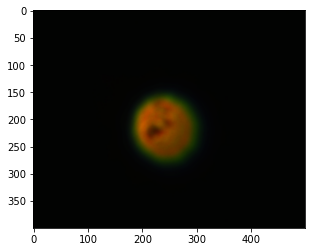

13:39    Moving to position 46.40000000000002 degrees.
13:39    Taking median of captured images.


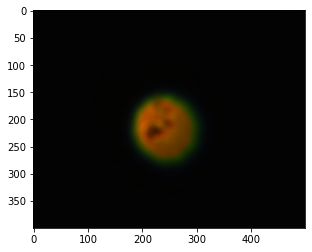

13:39    Moving to position 46.60000000000002 degrees.
13:39    Taking median of captured images.


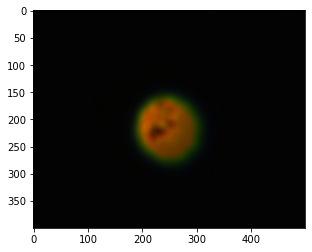

13:39    Moving to position 46.800000000000026 degrees.
13:40    Taking median of captured images.


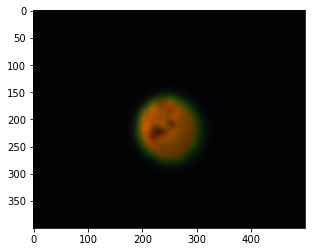

13:40    Moving to position 47.00000000000003 degrees.
13:40    Taking median of captured images.


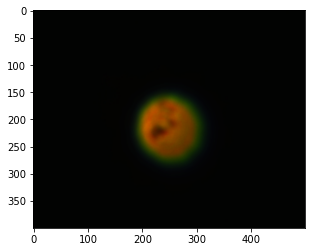

13:40    Moving to position 47.20000000000003 degrees.
13:40    Taking median of captured images.


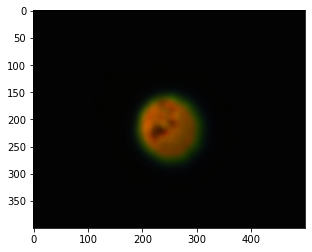

13:40    Moving to position 47.400000000000034 degrees.
13:41    Taking median of captured images.


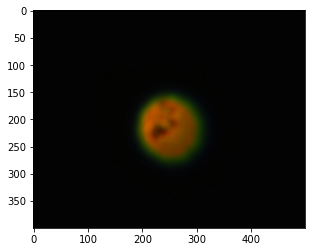

13:41    Moving to position 47.60000000000004 degrees.
13:41    Taking median of captured images.


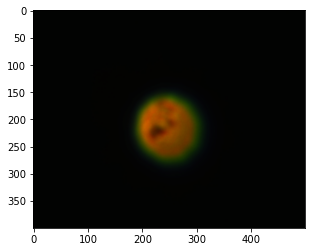

13:41    Moving to position 47.80000000000004 degrees.
13:41    Taking median of captured images.


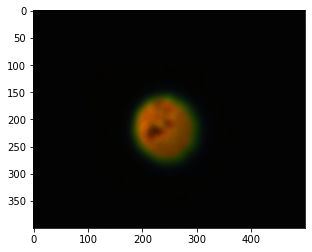

13:41    Moving to position 48.00000000000004 degrees.
13:41    Taking median of captured images.


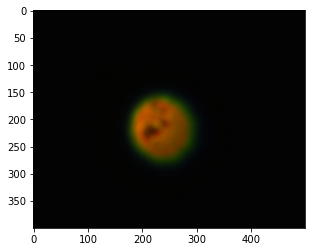

13:41    Moving to position 48.200000000000045 degrees.
13:42    Taking median of captured images.


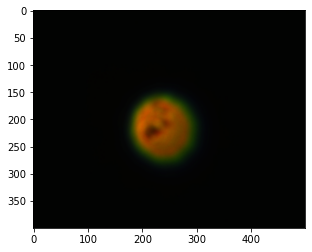

13:42    Moving to position 48.40000000000005 degrees.
13:42    Taking median of captured images.


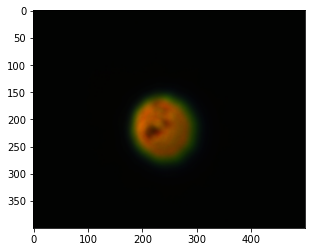

13:42    Moving to position 48.60000000000005 degrees.
13:42    Taking median of captured images.


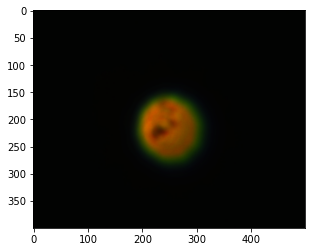

13:42    Moving to position 48.800000000000054 degrees.
13:42    Taking median of captured images.


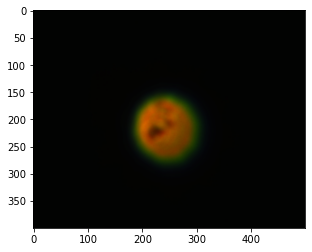

13:42    Moving to position 49.00000000000006 degrees.
13:43    Taking median of captured images.


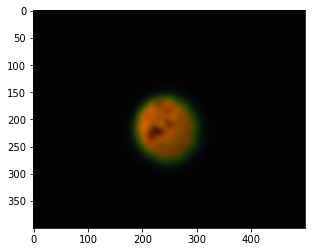

13:43    Moving to position 49.20000000000006 degrees.
13:43    Taking median of captured images.


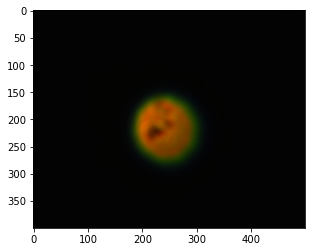

13:43    Moving to position 49.40000000000006 degrees.
13:43    Taking median of captured images.


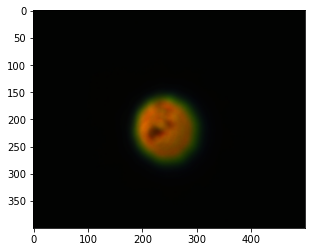

13:43    Moving to position 49.600000000000065 degrees.
13:44    Taking median of captured images.


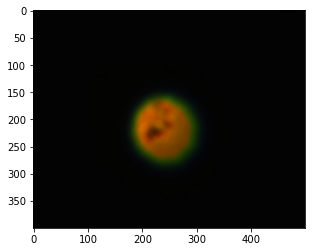

13:44    Moving to position 49.80000000000007 degrees.
13:44    Taking median of captured images.


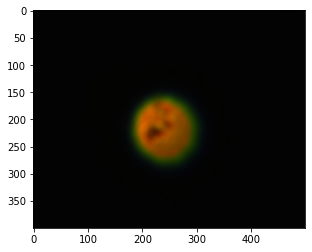

13:44    Moving to position 50.00000000000007 degrees.
13:44    Taking median of captured images.


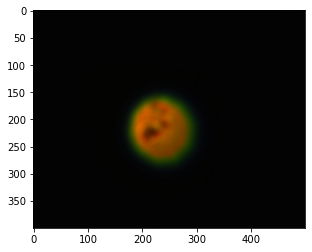

13:44    Moving to position 50.200000000000074 degrees.
13:44    Taking median of captured images.


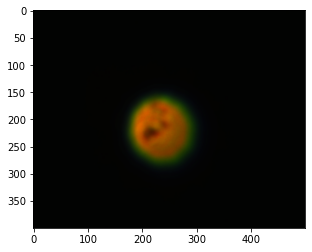

13:44    Moving to position 50.40000000000008 degrees.
13:45    Taking median of captured images.


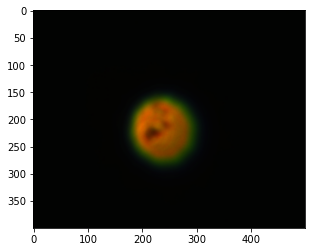

13:45    Moving to position 50.60000000000008 degrees.
13:45    Taking median of captured images.


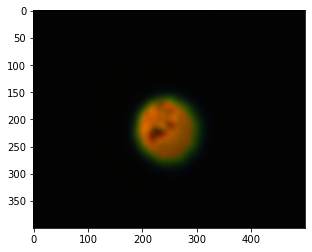

13:45    Moving to position 50.80000000000008 degrees.
13:45    Taking median of captured images.


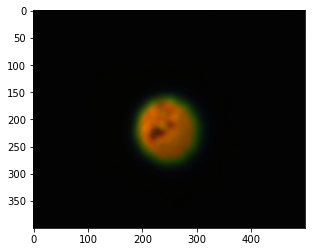

13:45    Moving to position 51.000000000000085 degrees.
13:45    Taking median of captured images.


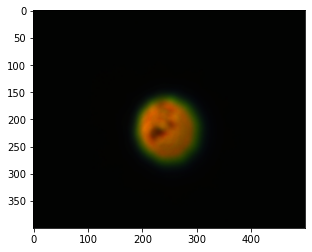

13:45    Moving to position 51.20000000000009 degrees.
13:46    Taking median of captured images.


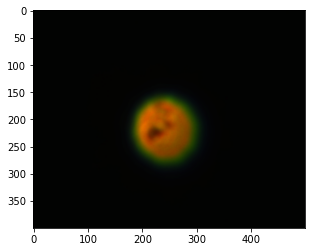

13:46    Moving to position 51.40000000000009 degrees.
13:46    Taking median of captured images.


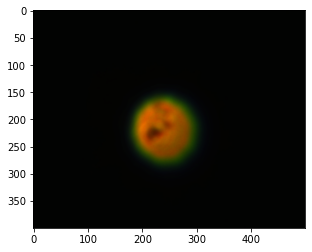

13:46    Moving to position 51.600000000000094 degrees.
13:46    Taking median of captured images.


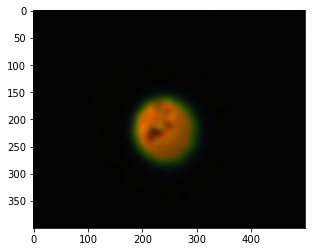

13:46    Moving to position 51.8000000000001 degrees.
13:47    Taking median of captured images.


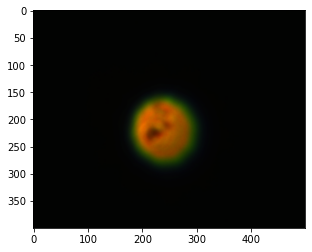

13:47    Moving to position 52.0000000000001 degrees.
13:47    Taking median of captured images.


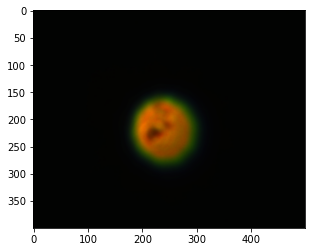

13:47    Moving to position 52.2000000000001 degrees.
13:47    Taking median of captured images.


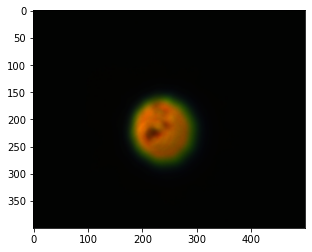

13:47    Moving to position 52.400000000000105 degrees.
13:47    Taking median of captured images.


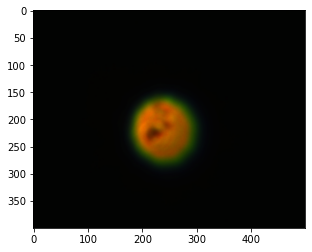

13:47    Moving to position 52.60000000000011 degrees.
13:48    Taking median of captured images.


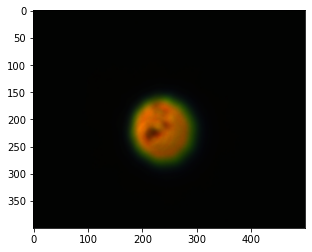

13:48    Moving to position 52.80000000000011 degrees.
13:48    Taking median of captured images.


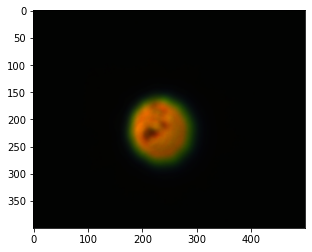

13:48    Moving to position 53.000000000000114 degrees.
13:48    Taking median of captured images.


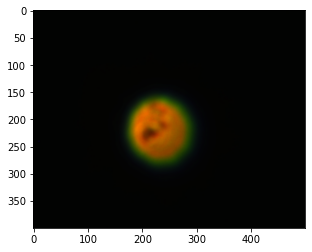

13:48    Moving to position 53.20000000000012 degrees.
13:48    Taking median of captured images.


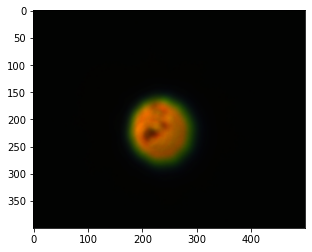

13:48    Moving to position 53.40000000000012 degrees.
13:49    Taking median of captured images.


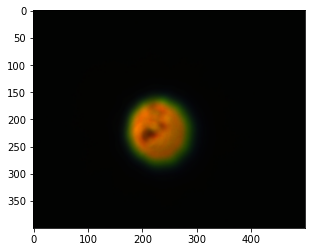

13:49    Moving to position 53.60000000000012 degrees.
13:49    Taking median of captured images.


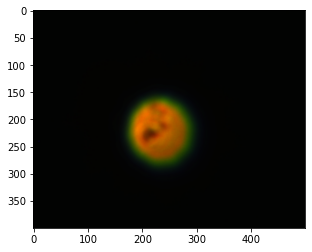

13:49    Moving to position 53.800000000000125 degrees.
13:49    Taking median of captured images.


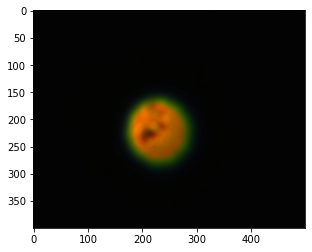

13:49    Moving to position 54.00000000000013 degrees.
13:50    Taking median of captured images.


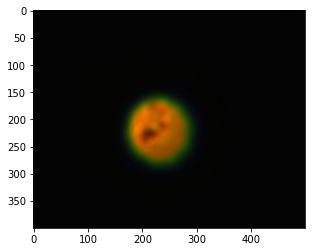

13:50    Moving to position 54.20000000000013 degrees.
13:50    Taking median of captured images.


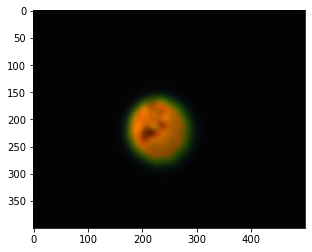

13:50    Moving to position 54.400000000000134 degrees.
13:50    Taking median of captured images.


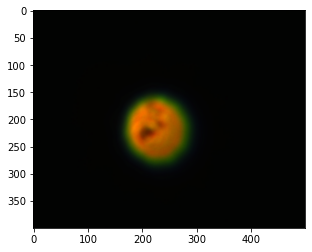

13:50    Moving to position 54.600000000000136 degrees.
13:50    Taking median of captured images.


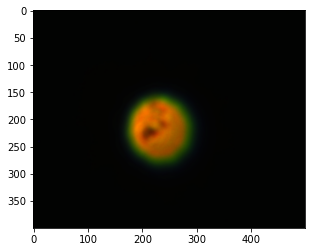

13:50    Moving to position 54.80000000000014 degrees.
13:51    Taking median of captured images.


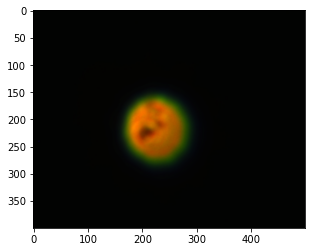

13:51    Moving to position 55.00000000000014 degrees.
13:51    Taking median of captured images.


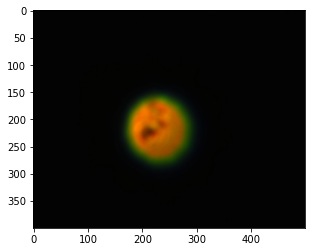

13:51    Moving to position 55.200000000000145 degrees.
13:51    Taking median of captured images.


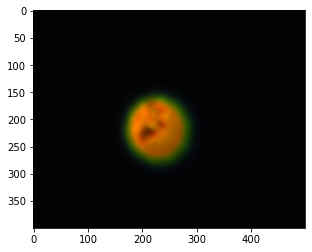

13:51    Moving to position 55.40000000000015 degrees.
13:51    Taking median of captured images.


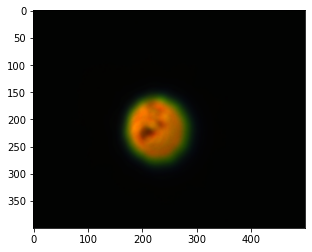

13:51    Moving to position 55.60000000000015 degrees.
13:52    Taking median of captured images.


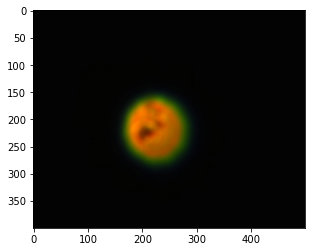

13:52    Moving to position 55.80000000000015 degrees.
13:52    Taking median of captured images.


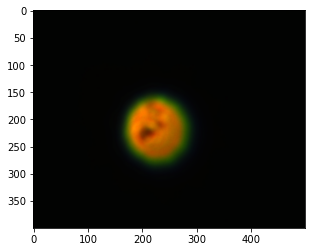

13:52    Moving to position 56.000000000000156 degrees.
13:52    Taking median of captured images.


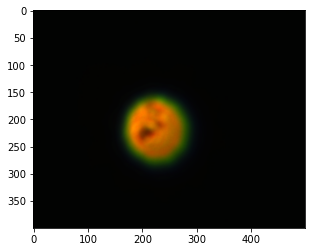

13:52    Moving to position 56.20000000000016 degrees.
13:53    Taking median of captured images.


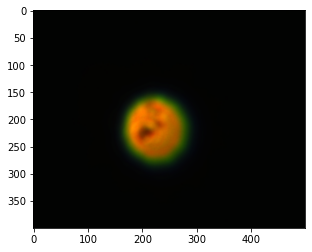

13:53    Moving to position 56.40000000000016 degrees.
13:53    Taking median of captured images.


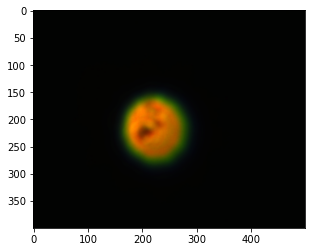

13:53    Moving to position 56.600000000000165 degrees.
13:53    Taking median of captured images.


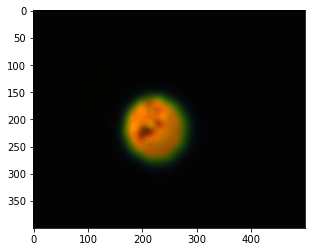

13:53    Moving to position 56.80000000000017 degrees.
13:53    Taking median of captured images.


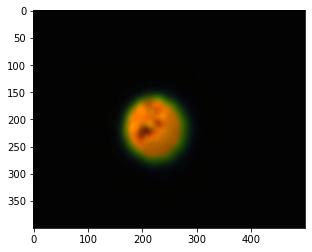

13:53    Moving to position 57.00000000000017 degrees.
13:54    Taking median of captured images.


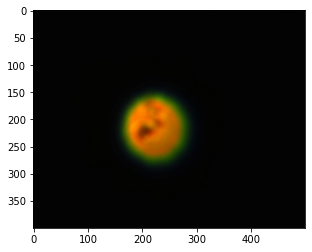

13:54    Moving to position 57.20000000000017 degrees.
13:54    Taking median of captured images.


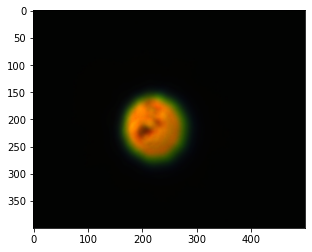

13:54    Moving to position 57.400000000000176 degrees.
13:54    Taking median of captured images.


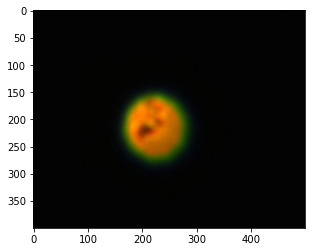

13:54    Moving to position 57.60000000000018 degrees.
13:54    Taking median of captured images.


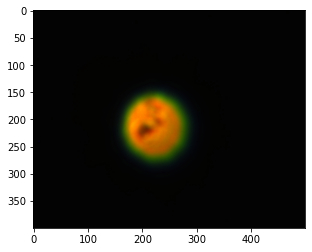

13:54    Moving to position 57.80000000000018 degrees.
13:55    Taking median of captured images.


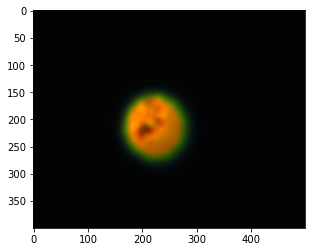

13:55    Moving to position 58.000000000000185 degrees.
13:55    Taking median of captured images.


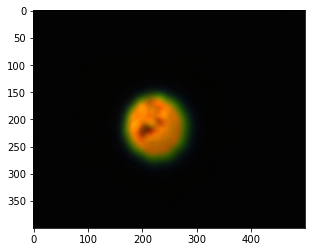

13:55    Moving to position 58.20000000000019 degrees.
13:55    Taking median of captured images.


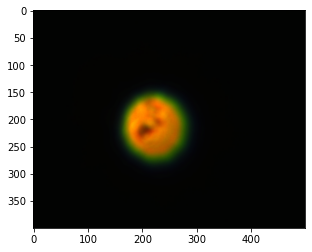

13:55    Moving to position 58.40000000000019 degrees.
13:56    Taking median of captured images.


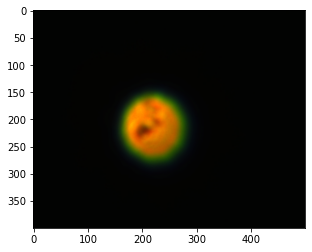

13:56    Moving to position 58.60000000000019 degrees.
13:56    Taking median of captured images.


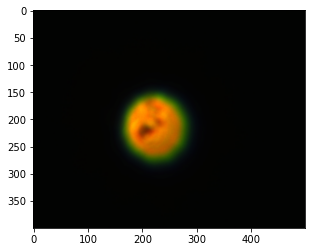

13:56    Moving to position 58.800000000000196 degrees.
13:56    Taking median of captured images.


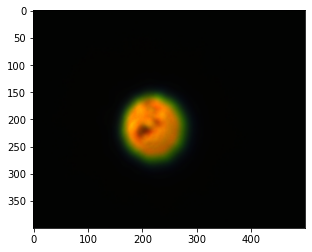

13:56    Moving to position 59.0000000000002 degrees.
13:56    Taking median of captured images.


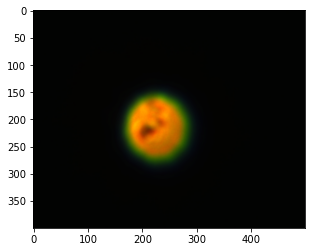

13:56    Moving to position 59.2000000000002 degrees.
13:57    Taking median of captured images.


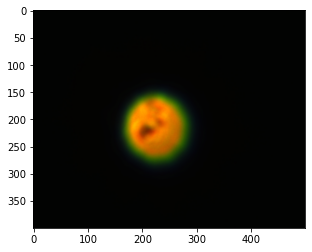

13:57    Moving to position 59.400000000000205 degrees.
13:57    Taking median of captured images.


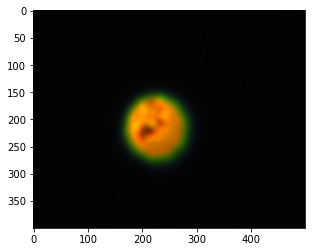

13:57    Moving to position 59.60000000000021 degrees.
13:57    Taking median of captured images.


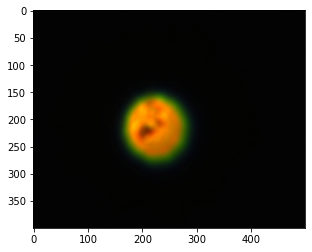

13:57    Moving to position 59.80000000000021 degrees.
13:57    Taking median of captured images.


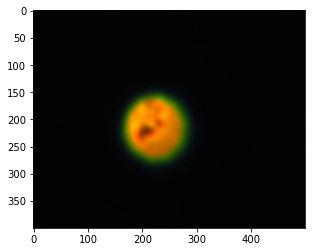

13:57    Moving to position 60.00000000000021 degrees.
13:58    Taking median of captured images.


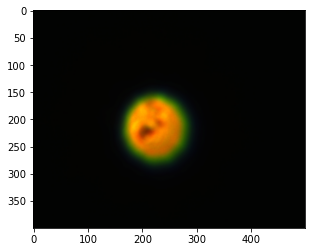

13:58    Moving to position 60.200000000000216 degrees.
13:58    Taking median of captured images.


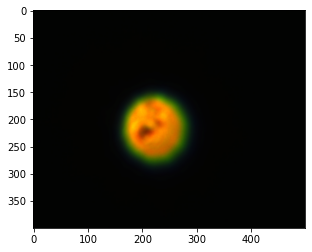

13:58    Moving to position 60.40000000000022 degrees.
13:58    Taking median of captured images.


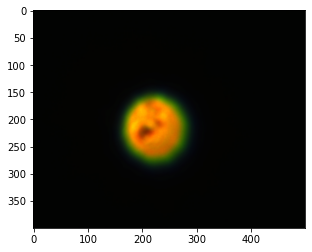

13:58    Moving to position 60.60000000000022 degrees.
13:59    Taking median of captured images.


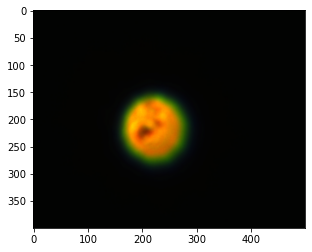

13:59    Moving to position 60.800000000000225 degrees.
13:59    Taking median of captured images.


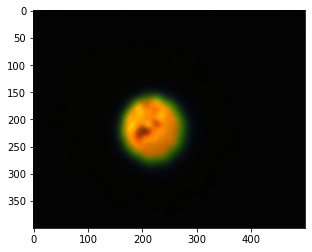

13:59    Moving to position 61.00000000000023 degrees.
13:59    Taking median of captured images.


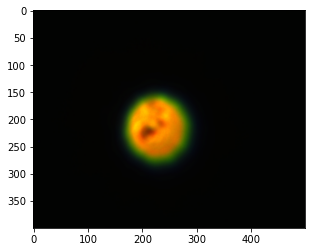

13:59    Moving to position 61.20000000000023 degrees.
13:59    Taking median of captured images.


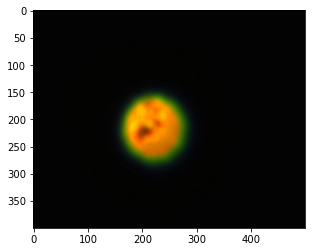

13:59    Moving to position 61.40000000000023 degrees.
14:00    Taking median of captured images.


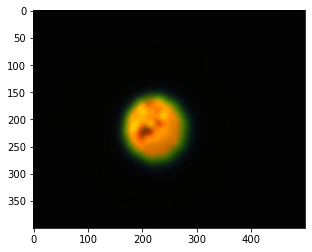

14:00    Moving to position 61.600000000000236 degrees.
14:00    Taking median of captured images.


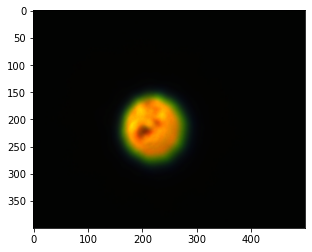

14:00    Moving to position 61.80000000000024 degrees.
14:00    Taking median of captured images.


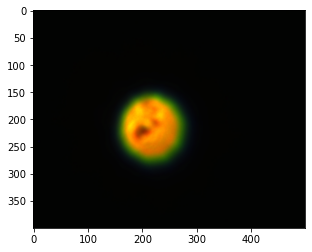

14:00    Moving to position 62.00000000000024 degrees.
14:00    Taking median of captured images.


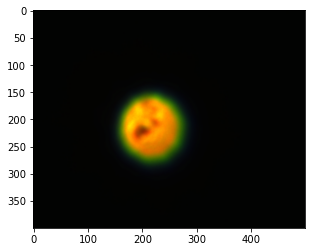

14:00    Moving to position 62.200000000000244 degrees.
14:01    Taking median of captured images.


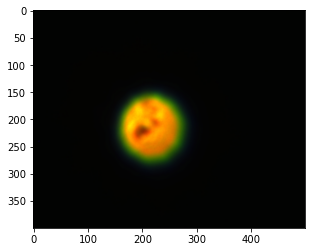

14:01    Moving to position 62.40000000000025 degrees.
14:01    Taking median of captured images.


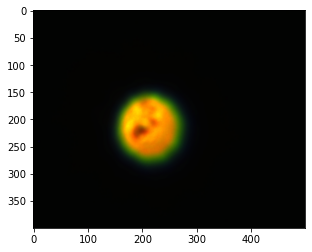

14:01    Moving to position 62.60000000000025 degrees.
14:01    Taking median of captured images.


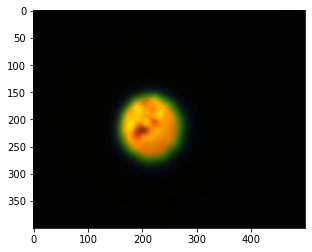

14:01    Moving to position 62.80000000000025 degrees.
14:02    Taking median of captured images.


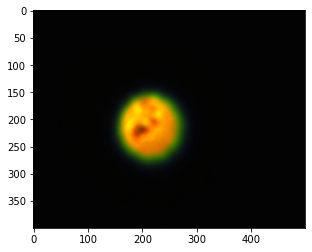

14:02    Moving to position 63.000000000000256 degrees.
14:02    Taking median of captured images.


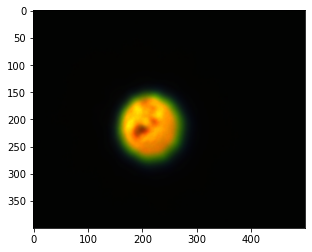

14:02    Moving to position 63.20000000000026 degrees.
14:02    Taking median of captured images.


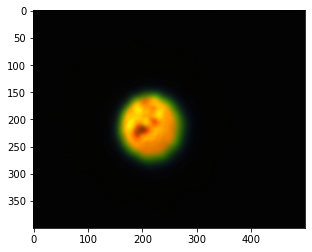

14:02    Moving to position 63.40000000000026 degrees.
14:02    Taking median of captured images.


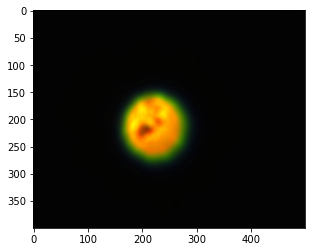

14:02    Moving to position 63.600000000000264 degrees.
14:03    Taking median of captured images.


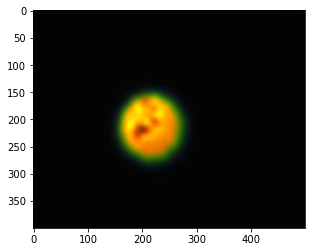

14:03    Moving to position 63.80000000000027 degrees.
14:03    Taking median of captured images.


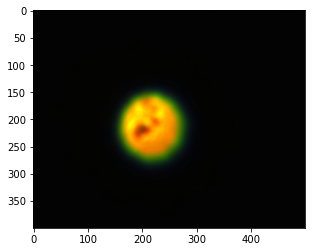

14:03    Moving to position 64.00000000000027 degrees.
14:03    Taking median of captured images.


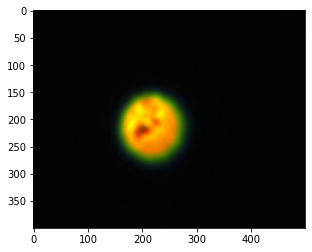

14:03    Moving to position 64.20000000000027 degrees.
14:03    Taking median of captured images.


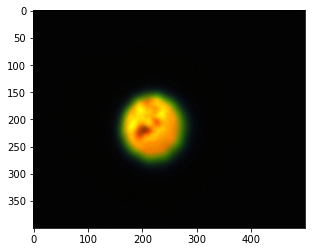

14:03    Moving to position 64.40000000000028 degrees.
14:04    Taking median of captured images.


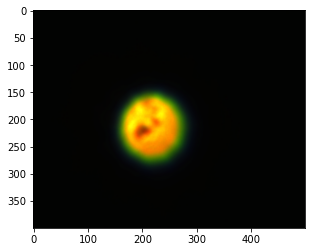

14:04    Moving to position 64.60000000000028 degrees.
14:04    Taking median of captured images.


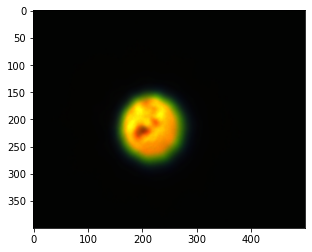

14:04    Moving to position 64.80000000000028 degrees.
14:04    Taking median of captured images.


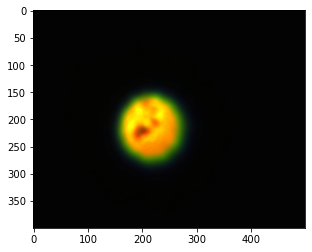

14:04    Moving to position 65.00000000000028 degrees.
14:05    Taking median of captured images.


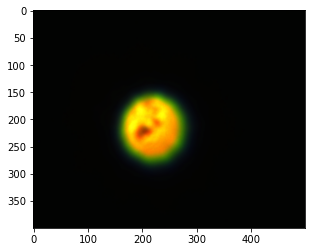

14:05    Moving to position 65.20000000000029 degrees.
14:05    Taking median of captured images.


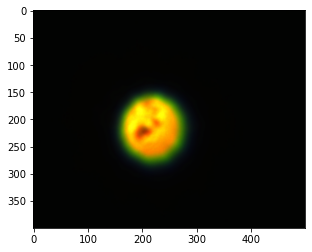

14:05    Measurement sequence completed!


In [3]:
measurement_name = 'S polarization'
metadata = {
    'Polarization source': 'S',
    'color filter': 'no',
}
experiment.brewster_sequence(measurement_name, metadata,
                             domain=[45, 65], 
                             step_size=0.2,
                             nframes=100,
                             dark=False,
                            )

In [5]:
# Shutdown experiment
experiment.cam.shutdown()
#experiment.cam_axis.move_home()
#experiment.sample_axis.move_home()

15:02    Disconnecting camera


In [1]:
from Modules.BCR import BCR
import time
name = 'Light source variance _weekend'
path = None
experiment = BCR(name, path)

Welcome to the Beetle Classifier Robot, great to have you back!
Let's start your experiment named: Light source variance _weekend.


11:47    No project folder defined. Using default output folder.
11:47    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments
11:47    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

11:47    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

11:47    Initializing connection with camera


In [2]:
experiment.sample_axis.move_absolute(90)
experiment.cam_axis.move_absolute(90)

17:13    Moving to position 90 degrees.
17:13    Moving to position 90 degrees.


In [4]:
from datetime import datetime
import time
import os
os.chdir('Light source variance')
while datetime.utcnow().day < 16 or datetime.utcnow().hour < 9:
    savefile = experiment.savefile_open()
    date = time.strftime('%Y%m%d', time.localtime())
    try:
        sequence = savefile.create_group(date)
        metadata = {'Date':date,'nframes':100}
        metadata.update(experiment.cam.get_settings())
        for key in metadata.keys():
            sequence.attrs[key] = metadata[key]
    except ValueError:
        sequence = savefile[date]
       
    img = experiment.cam.take_images(nframes=100,median=True,show=False)
    timestamp = time.strftime('%H:%M', time.localtime())
    measurement_metadata = {
        'timestamp': timestamp,
    }
    experiment.savefile_save_measurement(
       timestamp, sequence, img, measurement_metadata)

    savefile.close()
    time.sleep(60)
print('Measurement sequence completed!')   

11:51    Opening file Light source variance _weekend.hdf5
11:51    Taking median of captured images.
11:52    Opening file Light source variance _weekend.hdf5
11:52    Taking median of captured images.
11:53    Opening file Light source variance _weekend.hdf5
11:54    Taking median of captured images.
11:55    Opening file Light source variance _weekend.hdf5
11:55    Taking median of captured images.
11:56    Opening file Light source variance _weekend.hdf5
11:56    Taking median of captured images.
11:57    Opening file Light source variance _weekend.hdf5
11:57    Taking median of captured images.
11:58    Opening file Light source variance _weekend.hdf5
11:59    Taking median of captured images.
12:00    Opening file Light source variance _weekend.hdf5
12:00    Taking median of captured images.
12:01    Opening file Light source variance _weekend.hdf5
12:01    Taking median of captured images.
12:02    Opening file Light source variance _weekend.hdf5
12:02    Taking median of capture

13:12    Taking median of captured images.
13:13    Opening file Light source variance _weekend.hdf5
13:13    Taking median of captured images.
13:14    Opening file Light source variance _weekend.hdf5
13:15    Taking median of captured images.
13:16    Opening file Light source variance _weekend.hdf5
13:16    Taking median of captured images.
13:17    Opening file Light source variance _weekend.hdf5
13:17    Taking median of captured images.
13:18    Opening file Light source variance _weekend.hdf5
13:18    Taking median of captured images.
13:19    Opening file Light source variance _weekend.hdf5
13:20    Taking median of captured images.
13:21    Opening file Light source variance _weekend.hdf5
13:21    Taking median of captured images.
13:22    Opening file Light source variance _weekend.hdf5
13:22    Taking median of captured images.
13:23    Opening file Light source variance _weekend.hdf5
13:23    Taking median of captured images.
13:24    Opening file Light source variance _wee

KeyboardInterrupt: 

In [2]:
experiment.cam.shutdown()

NameError: name 'experiment' is not defined

In [1]:
from Modules.BCR import BCR
name = 'Lamp Polarization'
path = 'Experiments\Lamp Polarization'
experiment = BCR(name, path)

Welcome to the Beetle Classifier Robot, great to have you back!
Let's start your experiment named: Lamp Polarization.


16:52    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments\Lamp Polarization
16:52    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

16:52    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

16:52    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

16:52    Initializing connection with camera


In [2]:
experiment.cam.instrument.apply_settings({'exposure':0.015})
experiment.light_source_polarization(name='2021.11.15',domain=[-45,45],step_size=10)



image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  0.0149344
roi:  (400, 900, 300, 700, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  0.1499184


16:52    Opening file Lamp Polarization.hdf5
16:52    Moving to position 90 degrees.
16:52    Error code 13: MOTOR NOT ENABLED
16:52    Moving to position 90 degrees.
16:52    Error code 13: MOTOR NOT ENABLED
16:52    Moving to position 0 degrees.
WARNING. About to measure dark frame. Please make sure all lights are off.
Press ENTER to continue.
16:52    Captured dark frame.
Press ENTER to continue.
16:53    Starting measurement sequence.
16:53    Moving to position -45 degrees.
Please move the polarizor to position 152 degrees and press ENTER to continue.
16:53    Moving to position -35 degrees.
Please move the polarizor to position 162 degrees and press ENTER to continue.
16:53    Mov

In [3]:
experiment.cam.shutdown()

16:59    Disconnecting camera


In [1]:
from Modules.BCR import BCR
import time
name = 'Light source variance'
path = 'Experiments\Light source variance'
experiment = BCR(name, path)

Welcome to the Beetle Classifier Robot, great to have you back!
Let's start your experiment named: Light source variance.


17:00    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments\Light source variance
17:00    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

17:00    Error code 1
17:00    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

17:00    Initializing new connection with ESP.
Connected instrument:     ESP300 Version 3.08 09/09/02

17:00    Initializing connection with camera


NameError: name 'light_source_variance' is not defined

In [5]:
experiment.cam.instrument.apply_settings({'exposure':0.015})
experiment.light_source_variance(end_datetime=(2021,11,18,11,0,0), metadata={})



image_indexing:  rct
frame_format:  list
frame_info_format:  namedtuple
frame_info_period:  1
exposure:  0.0149344
roi:  (400, 900, 300, 700, 1, 1)
subsampling:  (1, 1)
binning:  (1, 1)
pixel_rate:  5000000.0
gains:  (1.0, 1.0, 1.0, 1.0)
gain_boost:  False
color_mode:  rgb8p
frame_period:  0.1499184


10:32    Starting light source variation measurement.
10:32    Total time: 1 days, 0.0 hours, and 27.0 minutes.
10:58    1 days and 0.0 hours to go.
11:59    0 days and 23.0 hours to go.
12:59    0 days and 22.0 hours to go.
13:58    0 days and 21.0 hours to go.
13:59    0 days and 21.0 hours to go.
14:58    0 days and 20.0 hours to go.
15:59    0 days and 19.0 hours to go.
16:58    0 days and 18.0 hours to go.
16:59    0 days and 18.0 hours to go.
17:58    0 days and 17.0 hours to go.
18:59    0 days and 16.0 hours to go.
19:59    0 days and 15.0 hours to go.
20:58    0 days and 14.0 hours to go.
20:59    0 days and 14.0 hours to go.
21:58    0 days and 13.0 hours to go.
22:59    0 day

In [ ]:
#experiment.cam.shutdown()
experiment.cam_axis.move_home()
experiment.sample_axis.move_home()
experiment.pol_axis.move_home()

# Test code please ignore

In [101]:
from pylablib.devices import uc480
import matplotlib.pyplot as plt
import numpy as np
cam = uc480.UC480Camera(cam_id=0)  # connect to the camera
dump = cam.snap()

TAcqTimings(exposure=0.09986666666666667, frame_period=0.0999915)


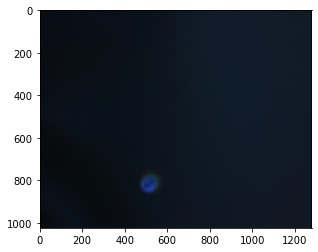

In [102]:

print(cam.get_frame_timings())
cam.wait_for_frame()
img = cam.snap()
plt.imshow(img)
plt.show()
cam.close()

In [40]:
cam.apply_settings({
    "frame_period": 1.0,
    "exposure": 0.001,
    "gains": (1.0, 1.0, 1.0, 1.0),
})
cam.set_frameskip_behavior('skip')
print(cam.get_settings())
#cam.wait_for_frame()
#images = cam.grab(10)
images = cam.grab(nframes=10, frame_timeout=5.0, missing_frame='skip', return_info=False, buff_size=20)
cam.close()
print(np.shape(images))
for img in images:
    plt.imshow(img)
    plt.show()

cam.close()

None
False
0
waited


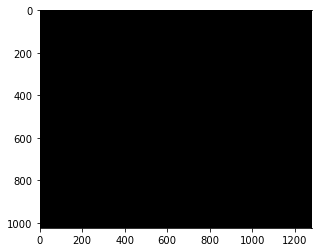

(1024, 1280, 3)
1
waited


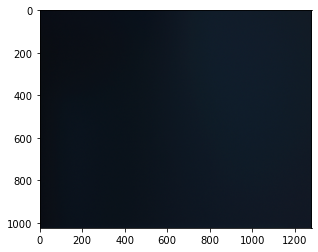

(1024, 1280, 3)
2
waited


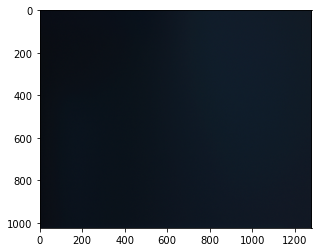

(1024, 1280, 3)
3
waited


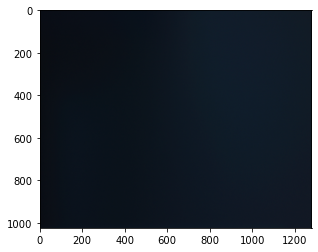

(1024, 1280, 3)
4
waited


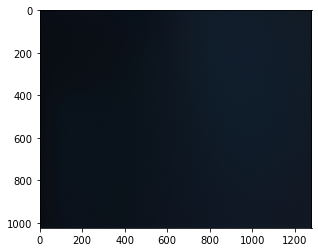

(1024, 1280, 3)
5
waited


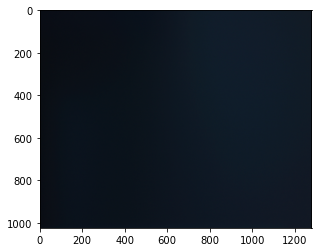

(1024, 1280, 3)
6
waited


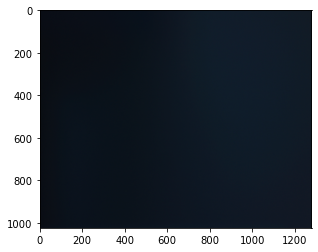

(1024, 1280, 3)
7
waited


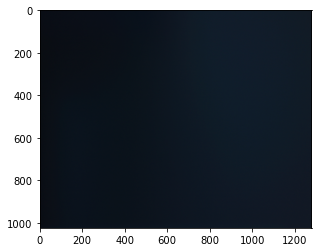

(1024, 1280, 3)
8
waited


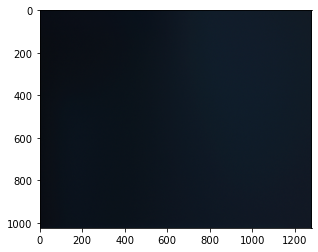

(1024, 1280, 3)
9
waited


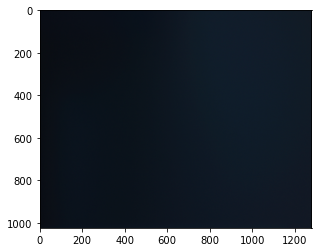

(1024, 1280, 3)


In [49]:
import numpy as np
with uc480.UC480Camera(cam_id=0) as cam: # to close the camera automatically
    print(cam.get_acquisition_parameters())
    print(cam.is_acquisition_setup())
    cam.start_acquisition()  # start acquisition (automatically sets it up as well)
    for i in range(10):  # acquisition loop
        print(i)
        cam.wait_for_frame()  # wait for the next available frame
        print('waited')
        frame=cam.read_oldest_image()  # get the oldest image which hasn't been read yet
        plt.imshow(frame)
        plt.show()
        print(np.shape(frame))


In [1]:
# Test brewster sequence
from Modules.BCR import BCR
import time
name = 'Brewster Angle testflight'
path = 'N:\Beetle Project\Beetle Classifier Robot\Experiments\Test'
experiment = BCR(name, path, testflight=True)

Welcome to the Beetle Classifier Robot, great to have you back!
Let's start your experiment named: Brewster Angle testflight.


11:12    Working directory changed to: N:\Beetle Project\Beetle Classifier Robot\Experiments\Test
11:12    Initializing fictional connection with ESP.
11:12    Initializing fictional connection with ESP.
11:12    Initializing fictional connection with camera.


In [ ]:
date = time.strftime('%Y-%m-%d', time.localtime())
domain = [30, 60]
step_size = 5
measurement_name = 'P polarization'
metadata = {
    'Polarization source': 'P',
    'Domain (degrees)': domain,
    'Step size (degrees)': step_size,
    'Date': date,
}
experiment.brewster_sequence(measurement_name, domain, step_size, metadata, dark=False)